In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

In [49]:
years = ['2003','2004','2005','2006','2007','2008']

totalM = pd.Series()
distC = pd.Series()
distM = pd.Series()
distG = pd.Series()
ctotalM = pd.Series()
cdistC = pd.Series()
cdistM = pd.Series()
cdistG = pd.Series()
dtotalM = pd.Series()
ddistC = pd.Series()
ddistM = pd.Series()
ddistG = pd.Series()

dctotalM = pd.Series()
dcdistC = pd.Series()
dcdistM = pd.Series()
dcdistG = pd.Series()

dwtotalM = pd.Series()
dwdistC = pd.Series()
dwdistM = pd.Series()
dwdistG = pd.Series()

dntotalM = pd.Series()
dndistC = pd.Series()
dndistM = pd.Series()
dndistG = pd.Series()

dstotalM = pd.Series()
dsdistC = pd.Series()
dsdistM = pd.Series()
dsdistG = pd.Series()

dltotalM = pd.Series()
dldistC = pd.Series()
dldistM = pd.Series()
dldistG = pd.Series()

r1 = 400
r2 = 800
for year in years:
    df = pd.read_csv(year+'.csv')

    ser = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(ser)
    ser = df[df.Distance <= r1].groupby(['Year','Month'])['Month'].count()
    distC = distC.append(ser)
    ser = df[(df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    distM = distM.append(ser)
    ser = df[df.Distance > r2].groupby(['Year','Month'])['Month'].count()
    distG = distG.append(ser)

    ser = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    ctotalM = ctotalM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    cdistC = cdistC.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    cdistM = cdistM.append(ser)
    ser = df[(df.Cancelled > 0) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    cdistG = cdistG.append(ser)

    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dtotalM = dtotalM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    ddistC = ddistC.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    ddistM = ddistM.append(ser)
    ser = df[((df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    ddistG = ddistG.append(ser)

    ser = df[(df.CarrierDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dctotalM = dctotalM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dcdistC = dcdistC.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dcdistM = dcdistM.append(ser)
    ser = df[((df.CarrierDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dcdistG = dcdistG.append(ser)

    ser = df[(df.WeatherDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dwtotalM = dwtotalM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dwdistC = dwdistC.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dwdistM = dwdistM.append(ser)
    ser = df[((df.WeatherDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dwdistG = dwdistG.append(ser)

    ser = df[(df.NASDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dntotalM = dntotalM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dndistC = dndistC.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dndistM = dndistM.append(ser)
    ser = df[((df.NASDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dndistG = dndistG.append(ser)

    ser = df[(df.SecurityDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dstotalM = dstotalM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dsdistC = dsdistC.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dsdistM = dsdistM.append(ser)
    ser = df[((df.SecurityDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dsdistG = dsdistG.append(ser)

    ser = df[(df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    dltotalM = dltotalM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance <= r1)].groupby(['Year','Month'])['Month'].count()
    dldistC = dldistC.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r1) & (df.Distance <= r2)].groupby(['Year','Month'])['Month'].count()
    dldistM = dldistM.append(ser)
    ser = df[((df.LateAircraftDelay > 0)) & (df.Distance > r2)].groupby(['Year','Month'])['Month'].count()
    dldistG = dldistG.append(ser)

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



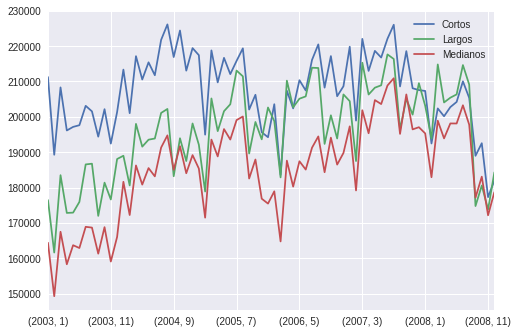

In [37]:
data = pd.DataFrame({
                    'Cortos': distC,
                    'Medianos': distM,
                    'Largos' : distG
})
data.plot()
plt.show()

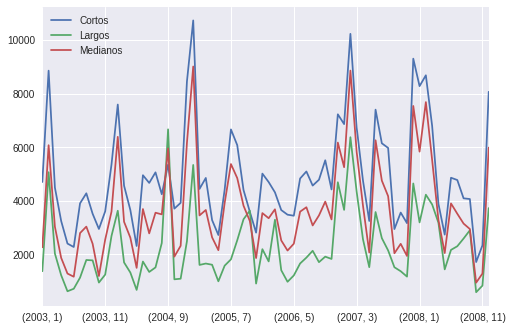

In [39]:
data = pd.DataFrame({
                    'Cortos': cdistC,
                    'Medianos': cdistM,
                    'Largos' : cdistG
})
data.plot()
plt.show()

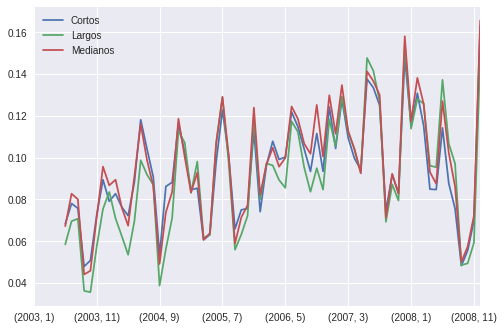

In [62]:
data = pd.DataFrame({
                    'Cortos': dldistC/distC,
                    'Medianos': dldistM/distM,
                    'Largos' : dldistG/distG
})
data.plot()
plt.show()

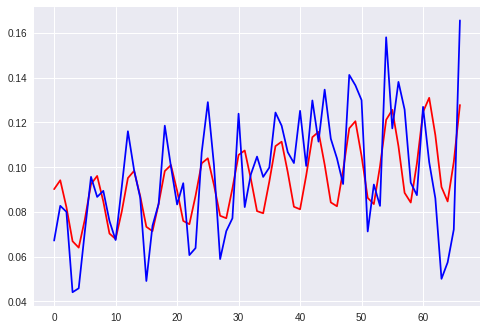

0.000378307430006516

In [72]:
train_y = (dldistC/distC)[5:].values
train_x = np.arange(0, train_y.size, 1)
fit_y = (dldistM/distM)[5:].values
fit_x = np.arange(0, fit_y.size, 1) 
def la(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * np.cos(x*d+e) + f * np.sin(x*g+h)


fun = la
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)
plt.plot(fit_x, y_pred, 'r-', label='fit')



plt.plot(fit_x, fit_y, 'b-', label='data')

plt.show()
np.mean((fit_y - y_pred)**2) ##Error

In [71]:
(dldistM/distM)

(2003, 1)          NaN
(2003, 2)          NaN
(2003, 3)          NaN
(2003, 4)          NaN
(2003, 5)          NaN
(2003, 6)     0.067151
(2003, 7)     0.082696
(2003, 8)     0.080028
(2003, 9)     0.044061
(2003, 10)    0.045814
(2003, 11)    0.071340
(2003, 12)    0.095660
(2004, 1)     0.086695
(2004, 2)     0.089392
(2004, 3)     0.075948
(2004, 4)     0.067396
(2004, 5)     0.091056
(2004, 6)     0.116064
(2004, 7)     0.098808
(2004, 8)     0.086338
(2004, 9)     0.049070
(2004, 10)    0.073786
(2004, 11)    0.083590
(2004, 12)    0.118562
(2005, 1)     0.100291
(2005, 2)     0.083309
(2005, 3)     0.092826
(2005, 4)     0.060661
(2005, 5)     0.063804
(2005, 6)     0.106588
                ...   
(2006, 7)     0.118556
(2006, 8)     0.106676
(2006, 9)     0.101839
(2006, 10)    0.125205
(2006, 11)    0.100537
(2006, 12)    0.129840
(2007, 1)     0.111425
(2007, 2)     0.134681
(2007, 3)     0.112714
(2007, 4)     0.103944
(2007, 5)     0.092458
(2007, 6)     0.141257
(2007, 7)  